# PROJECT:

#  HOUSE MARKET ANALYSIS IN PAKISTAN

Our project, “House Price Market Analysis in Pakistan”, focuses on understanding and predicting property prices in major Pakistani cities such as Karachi, Lahore, and Islamabad. Housing markets in these cities show large price variations due to differences in location, property size, number of rooms, house age, and neighborhood quality. Because of these variations, buyers and investors often find it difficult to estimate fair property prices.

To address this problem, we use data science techniques to clean and analyze housing datasets, study the factors that affect prices, and build predictive models such as Linear Regression. We also apply K-Means clustering to group properties into affordable, mid-range, and luxury categories. This analysis helps buyers, investors, and real estate developers make better, more informed decisions based on real data.

# Library Imports for Data Analysis and Predictive Modeling:
This section initializes the project environment by importing essential libraries needed for data manipulation, statistical computation, visualization, and machine learning tasks, specifically focusing on Linear Regression

In [131]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# CSV FILE LOADING
# Data Loading

Uses the pd.read_csv() function from the Pandas library to read the file named "House Price Market Analysis in Pakistan.csv".
The entire dataset is stored in the df DataFrame, which will serve as the primary object for all data operations in the project.

In [2]:
df = pd.read_csv("House Price Market Analysis in Pakistan.csv")

# Initial Data Preview
Provides a high-level preview of the dataset immediately after loading, verifying column headers and data format.

In [25]:
df.head()

,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,agence,agent,area.1,area unit,month,day,year,area_numeric
0,0,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,31.471571,73.301339,3.0,8 Marla,For Sale,3,Other,Other,8.0,Marla,7.0,10.0,2019.0,8.0
1,1,Unknown,7800000.0,Other,Islamabad,Islamabad Capital,33.698244,72.984238,2.0,6.2 Marla,For Sale,2,Other,Other,6.2,Marla,5.0,5.0,2019.0,6.2
2,2,House,50000000.0,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7.0,1 Kanal,For Sale,7,Other,Other,1.0,Kanal,10.0,19.0,2018.0,20.0
3,3,Penthouse,40000000.0,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5.0,1 Kanal,For Sale,5,Other,Other,1.0,Kanal,6.0,27.0,2019.0,20.0
4,4,Flat,35000000.0,Other,Islamabad,Islamabad Capital,33.728873,73.119628,3.0,7.1 Marla,For Sale,3,Other,Other,7.1,Marla,6.0,3.0,2019.0,7.1


# Tail method

In [148]:
df.tail()

,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,...,bedrooms,agence,agent,area.1,area unit,month,day,year,area_numeric,area_sqft
2031,1997,House,19500000.0,Other,Lahore,Punjab,31.446824,74.404736,5.0,19500000.0,...,4,Haram Estate & Builders,Other,10.0,Marla,5.0,3.0,2019.0,10.0,19500000.0
2032,1998,House,23500000.0,Other,Lahore,Punjab,31.462347,74.293642,6.0,23500000.0,...,5,Other,Other,12.0,Marla,6.0,29.0,2019.0,12.0,23500000.0
2033,1999,House,15000000.0,Other,Lahore,Punjab,31.458503,74.370360,4.0,15000000.0,...,4,Other,Other,10.0,Marla,6.0,11.0,2019.0,10.0,15000000.0
2034,2000,House,32000000.0,DHA Defence,Lahore,Punjab,31.462493,74.409342,5.0,32000000.0,...,4,Haram Estate & Builders,Other,10.0,Marla,6.0,18.0,2019.0,10.0,32000000.0
2035,1863,House,22000000.0,Other,Lahore,Punjab,31.445580,74.401217,5.0,22000000.0,...,4,Haram Estate & Builders,Other,10.0,Marla,6.0,29.0,2019.0,10.0,22000000.0


# Data Structure and Type Summary
The main job of this step is to guide our data cleaning and preparation: you figure out which columns are dirty (missing values) and which ones are in the wrong format (text instead of numbers) for your machine learning model.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2036 non-null   int64  
 1   property_type  2036 non-null   object 
 2   price          2036 non-null   float64
 3   location       2036 non-null   object 
 4   city           2036 non-null   object 
 5   province_name  2036 non-null   object 
 6   latitude       2036 non-null   float64
 7   longitude      2036 non-null   float64
 8   baths          2036 non-null   float64
 9   area           2036 non-null   object 
 10  purpose        2036 non-null   object 
 11  bedrooms       2036 non-null   int64  
 12  agence         2036 non-null   object 
 13  agent          2036 non-null   object 
 14  area.1         2036 non-null   float64
 15  area unit      2036 non-null   object 
 16  month          2036 non-null   float64
 17  day            2036 non-null   float64
 18  year    

# Data Dimensions (Shape)
Confirms the total volume of data, which is necessary before proceeding with cleaning and modeling.

In [149]:
print("Shape of dataset" , df.shape)

Shape of dataset (2036, 21)


# List of Columns/Features
This code block extracts and prints a simple list of all column names (features)
checking for typographical errors, and preparing for feature selection or renaming.

In [151]:
print(list(df.columns))

['ID', 'property_type', 'price', 'location', 'city', 'province_name', 'latitude', 'longitude', 'baths', 'area', 'purpose', 'bedrooms', 'agence', 'agent', 'area.1', 'area unit', 'month', 'day', 'year', 'area_numeric', 'area_sqft']


# Data Types per Feature
This attribute provides a Series showing the data type (dtype) assigned to each column

In [152]:
df.dtypes

ID                 int64
property_type     object
price            float64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths            float64
area             float64
purpose           object
bedrooms           int64
agence            object
agent             object
area.1           float64
area unit         object
month            float64
day              float64
year             float64
area_numeric     float64
area_sqft        float64
dtype: object

# Count of Missing Values per Column
This method chain calculates and displays the total count of missing values (NaN) for every single column

In [29]:
df.isnull().sum()

ID                0
property_type    13
price             6
location          8
city             23
province_name    20
latitude          0
longitude         0
baths             0
area             10
purpose          10
bedrooms          0
agence            2
agent             2
area.1            0
area unit         5
month             0
day               0
year              0
dtype: int64

# Data Cleaning - Null Handling

In [28]:
numeric_cols = ['latitude', 'longitude', 'baths', 'area.1', 'bedrooms', 'month', 'day', 'year']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [30]:
cat_cols = ['property_type', 'location', 'city', 'province_name', 'purpose', 'agence', 'area unit']
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [241]:
df['price'] = df['price'].fillna(df['price'].median())

# Area and Price Conversion Functions

In [242]:
def fill_area(val, area_num):
    if pd.isna(val):
        return f"{area_num} Marla"
    return val
df['area'] = df.apply(lambda row: fill_area(row['area'], row['area_numeric']), axis=1)

# Agent and Category Processing

In [243]:
# Fill missing agent values
df['agent'] = df['agent'].fillna('Unknown')
# Keep only top 10 agents, rest as 'Other'
top_agents = df['agent'].value_counts().nlargest(10).index
df['agent'] = df['agent'].apply(lambda x: x if x in top_agents else 'Other')

In [195]:
df.isnull().sum()

ID               0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
agence           0
agent            0
area.1           0
area unit        0
month            0
day              0
year             0
area_numeric     0
area_sqft        0
Clusters         0
dtype: int64

In [196]:
def convert_area(val):
    if pd.isna(val):
        return np.nan
    val = str(val)
    if 'Kanal' in val:
        return float(val.replace('Kanal','').strip()) * 20
    elif 'Marla' in val:
        return float(val.replace('Marla','').strip())
    elif 'Sqft' in val.lower():
        return float(val.lower().replace('sqft','').strip()) / 225
    else:
        try:
            return float(val)
        except:
            return np.nan
df['area_numeric'] = df['area'].apply(convert_area)
df['area_numeric'] = df['area_numeric'].fillna(df['area_numeric'].median())
# Add 'area_numeric' to numeric columns
numeric_cols.append('area_numeric')

In [197]:
def top_categories(col, top_n=10):
    top = df[col].value_counts().nlargest(top_n).index
    return df[col].apply(lambda x: x if x in top else 'Other')
high_card_cols = ['location', 'city', 'agence']
for col in high_card_cols:
    df[col] = top_categories(col, top_n=10)

# Encoding Categorical Variables

In [198]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Encoded dataframe shape:", df_encoded.shape)

Encoded dataframe shape: (2036, 71)


In [199]:
X = df[['area']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
# Use pandas get_dummies
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
# Align train and test columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [201]:
# Function to clean price values
def clean_price(value):
    if pd.isnull(value):
        return np.nan
    value = str(value).lower().replace("pkr", "").replace("rs.", "").replace(",", "").strip()
    if "crore" in value:
        num = float(value.split()[0])
        return num * 10000000
    if "lac" in value or "lakh" in value:
        num = float(value.split()[0])
        return num * 100000
    # Pure numeric case
    try:
        return float(value)
    except:
        return np.nan
# Apply cleaning
df["area"] = df["price"].apply(clean_price)

In [202]:
# Convert area values to sqft
def clean_area(val):
    if pd.isnull(val):
        return np.nan
    v = str(val).lower()
    # Kanal
    if "kanal" in v:
        num = float(v.split()[0])
        return num * 5445

    # Marla
    if "marla" in v:
        num = float(v.split()[0])
        return num * 272.25

    # sqft only
    if "sq" in v:
        return float(v.split()[0])

    try:
        return float(v)
    except:
        return np.nan

df["area_sqft"] = df["area"].apply(clean_area)

# Exploratory Data Analysis (EDA)
# Visulization

# Distribution of Property Area (in sqft)
# HISTOGRAM

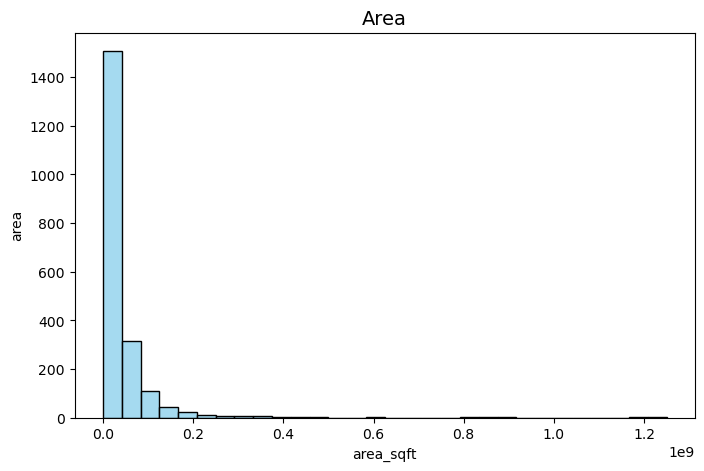

In [244]:
plt.figure(figsize=(8,5))
sns.histplot(df['area'], kde=False, color='skyblue', bins=30)
plt.title('Area', fontsize=14)
plt.ylabel('area')
plt.xlabel('area_sqft')
plt.show()

# "Monthly Trend of Total Property Prices Across Years"

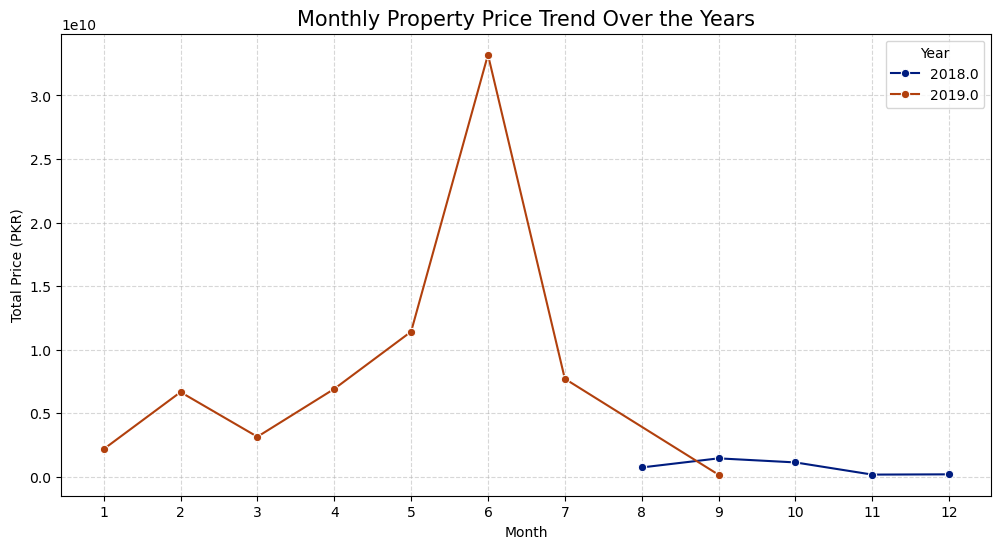

In [204]:
monthly_prices = df.groupby(['year', 'month'], observed=True)['price'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_prices,
    x='month',
    y='price',
    hue='year',
    palette='dark',
    marker='o'
)
plt.title('Monthly Property Price Trend Over the Years', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Total Price (PKR)')
plt.xticks(range(1,13))  # ensure all months appear
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Distribution of Properties by Type (HISTOGRAM)

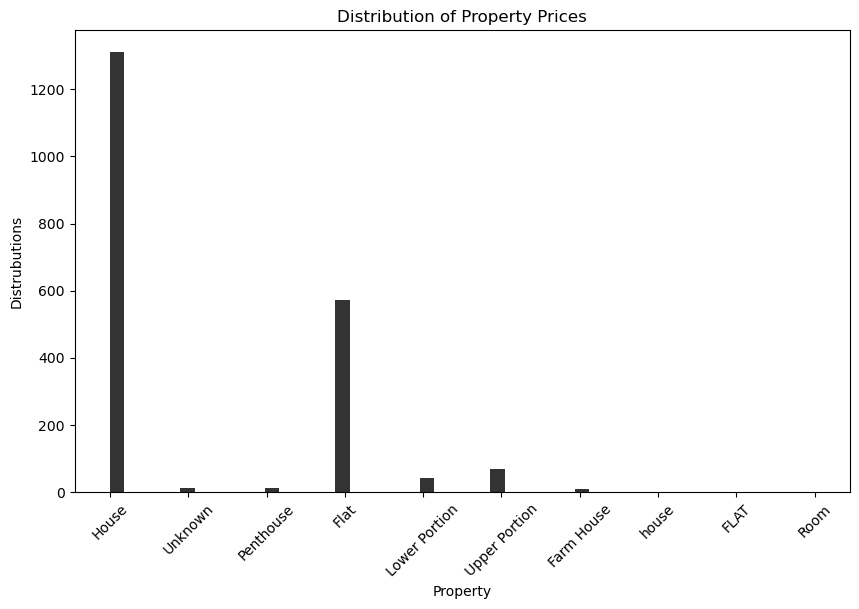

In [205]:
plt.figure(figsize=(10,6))
plt.hist(df['property_type'], bins=50, color='black', alpha=0.8)
plt.title("Distribution of Property Prices")
plt.xlabel("Property")
plt.ylabel("Distrubutions")
plt.xticks(rotation=45)
plt.show()

# BARPLOT

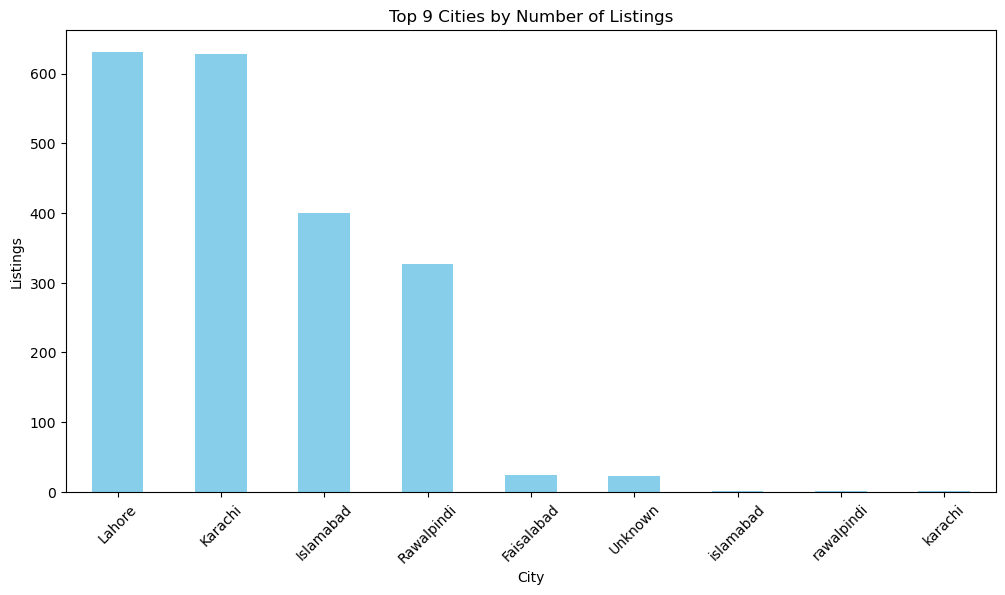

In [206]:
plt.figure(figsize=(12,6))
df['city'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 9 Cities by Number of Listings")
plt.xlabel("City")
plt.ylabel("Listings")
plt.xticks(rotation=45)
plt.show()

# Countplot

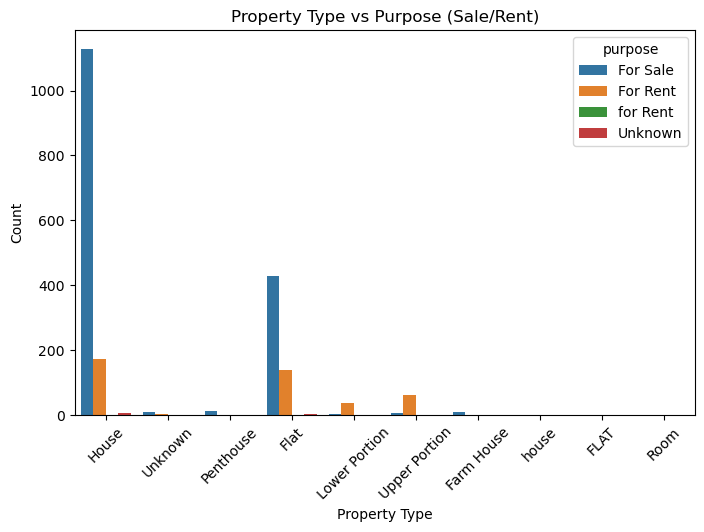

In [207]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["property_type"], hue=df["purpose"])
plt.title("Property Type vs Purpose (Sale/Rent)")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
# Correlation Analysis
We use a correlation heatmap to visually analyze relationships between numerical variables in a dataset. It’s a quick way to understand how features relate to each other

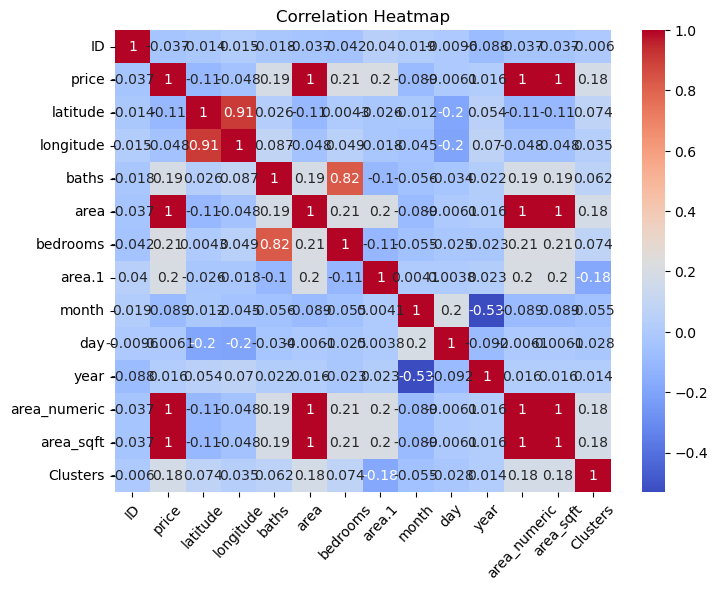

In [208]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.xticks(rotation=47)
plt.show()

# MODEL 1  Random Forest Regression

In [238]:
from sklearn.ensemble import RandomForestRegressor

In [252]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
# Prepare features and target
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [249]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):,.0f}")
print(f"R²: {r2_score(y_test, y_pred_rf):.4f}")

Random Forest Results:
MSE: 48,533,139,225,809
R²: 0.9920


# MODEL 2 LinearRegression

In [212]:
X = df[['area']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [213]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [214]:
# Make predictions
y_pred = model.predict(X_test)

In [215]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [216]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Model Coefficients: [1.]
Model Intercept: 1.4901161193847656e-08
Mean Squared Error: 1.1016491648054464e-15
R² Score: 1.0


# Model 3 KNN 

In [217]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [218]:
# Numerical columns
num_cols = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'area_numeric']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
# Categorical columns
cat_cols = ['property_type', 'location', 'city', 'province_name', 'purpose', 'agence', 'agent', 'area unit']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [228]:
#One‑Hot Encoding

In [219]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
# Feature and Target Split

In [220]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [ ]:
# Train‑Test Split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Feature Scaling

In [222]:
Scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [229]:
# Build & Train KNN Model

In [223]:
knn_model = KNeighborsRegressor(n_neighbors=7) 
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [230]:
# Predict & Evaluate

In [224]:
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R² Score:", r2_score(y_test, y_pred_knn))

KNN Regression Results:
Mean Squared Error: 1135920593973539.5
R² Score: 0.8136156067916923


# K-Means Clustering

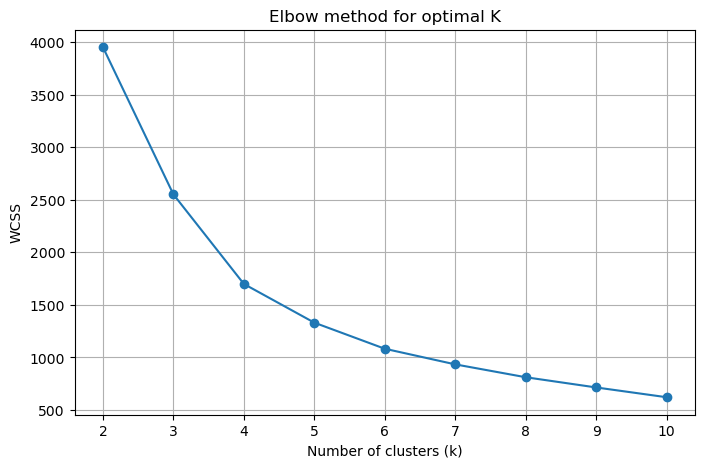

In [225]:
data = df[['price', 'area_sqft', 'bedrooms']]
data.head()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)   
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
df.head()
from sklearn.cluster import KMeans
wcss =[]
K = range(2, 11)   # started from 2 to avoid warning bcz when we started from 1 its gives a warning
for k in K:
    kmeans= KMeans(n_clusters=k, random_state=42, n_init=10, algorithm="elkan")
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.title("Elbow method for optimal K")
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [226]:
kmeans= KMeans(n_clusters=6, random_state=42, n_init=10)
clusters= kmeans.fit_predict(scaled_data)
df['Clusters'] = clusters
df.head()

,ID,property_type,price,location,city,province_name,latitude,longitude,baths,area,...,agence,agent,area.1,area unit,month,day,year,area_numeric,area_sqft,Clusters
0,0,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,31.471571,73.301339,3.0,7000000.0,...,Other,Other,8.0,Marla,7.0,10.0,2019.0,7000000.0,7000000.0,0
1,1,Unknown,7800000.0,Other,Islamabad,Islamabad Capital,33.698244,72.984238,2.0,7800000.0,...,Other,Other,6.2,Marla,5.0,5.0,2019.0,7800000.0,7800000.0,4
2,2,House,50000000.0,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7.0,50000000.0,...,Other,Other,1.0,Kanal,10.0,19.0,2018.0,50000000.0,50000000.0,3
3,3,Penthouse,40000000.0,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5.0,40000000.0,...,Other,Other,1.0,Kanal,6.0,27.0,2019.0,40000000.0,40000000.0,3
4,4,Flat,35000000.0,Other,Islamabad,Islamabad Capital,33.728873,73.119628,3.0,35000000.0,...,Other,Other,7.1,Marla,6.0,3.0,2019.0,35000000.0,35000000.0,0


# Trained Decision Tree

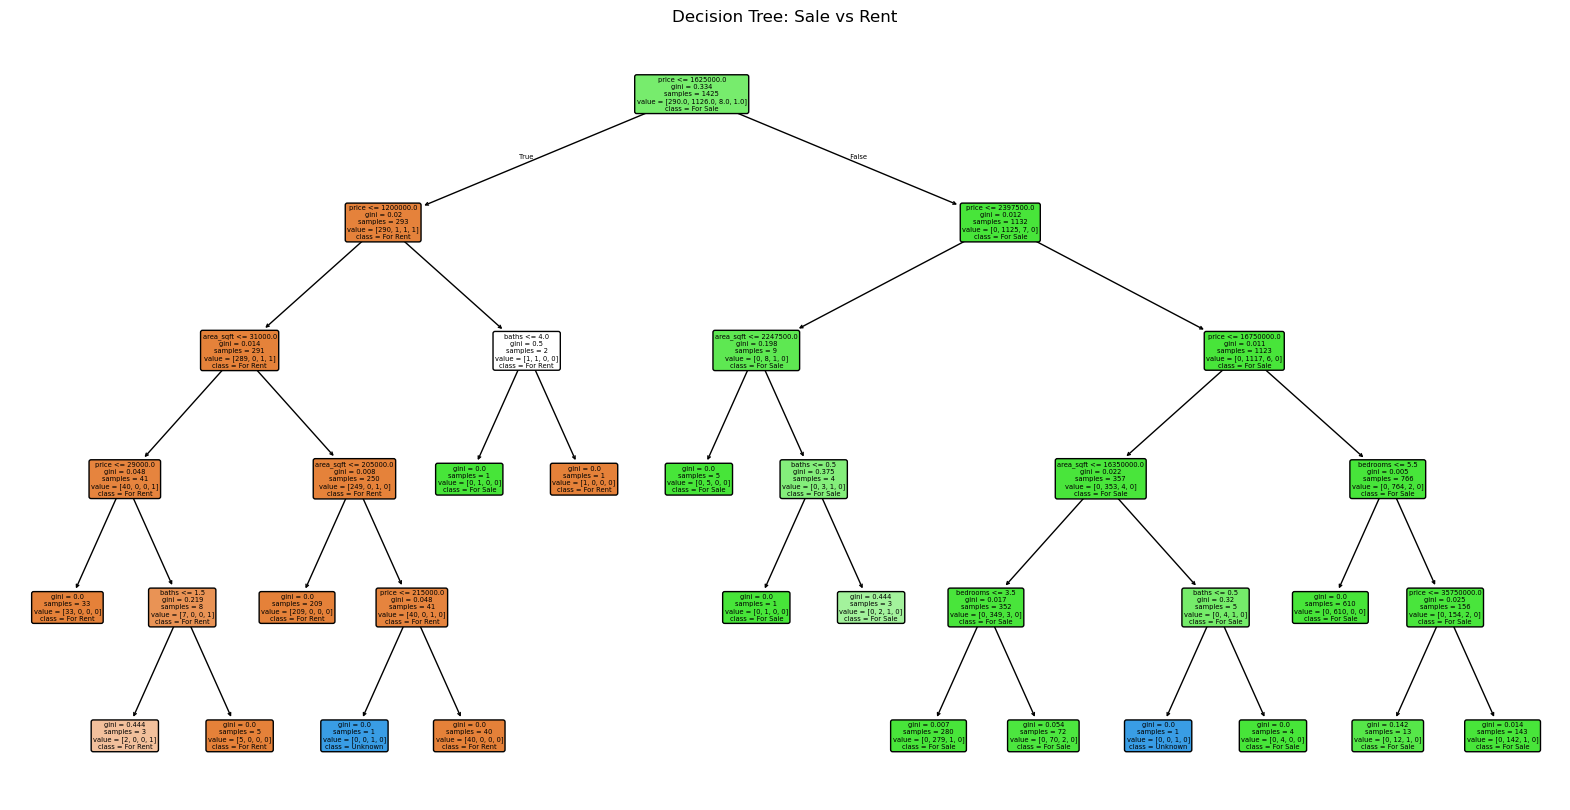

In [257]:
X_class = df[['price', 'area_sqft', 'bedrooms', 'baths']].fillna(0)
y_class = df['purpose']
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class_encoded, test_size=0.3, random_state=42
)
# Train Decision Tree
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train_class, y_train_class)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_class.columns, 
          class_names=le.classes_, filled=True, rounded=True)
plt.title('Decision Tree: Sale vs Rent')
plt.show()